- Module Title: Machine Learning For AI
- Assessment Title: ML_CA1
- Lecturer Name: David McQuaid
- Student Full Name: Caroline de Sa Teixeira
- Student Number: 2020331
- Assessment Due Date: 22/04/2024
- Date of Submission: 29/03/2024

##### Github link: https://github.com/carolinedesat/ML_CA1

# 1. Libraries and Dataset

The following code will import all the necessary libraries and the log2.csv dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('log2.csv', header=0)

By displaying the first 10 rows, shape and info we can see that the dataset contains 12 columns (Source Port, Destination Port, NAT Source Port, NAT Destination Port, Bytes, Bytes Sent, Bytes Received, Packets, Elapsed Time (sec), pkts_sent, pkts_received and Action). Apart from the Action column which is of type object, all the other values are of type integer. We can also see that log2.csv contains a total of 65532 rows.

In [3]:
df.head(10)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow
5,51465,443,39975,443,3961,1595,2366,21,16,12,9,allow
6,60513,47094,45469,47094,320,140,180,6,7,3,3,allow
7,50049,443,21285,443,7912,3269,4643,23,96,12,11,allow
8,52244,58774,2211,58774,70,70,0,1,5,1,0,allow
9,50627,443,16215,443,8256,1674,6582,31,75,15,16,allow


In [4]:
df.shape

(65532, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


The nunique method displays all the unique values in each column, and by getting the sum of all the nulls we can see that we don't have any null values in the dataset.

In [6]:
df.nunique()

Source Port             22724
Destination Port         3273
NAT Source Port         29152
NAT Destination Port     2533
Bytes                   10724
Bytes Sent               6683
Bytes Received           8814
Packets                  1116
Elapsed Time (sec)        915
pkts_sent                 749
pkts_received             922
Action                      4
dtype: int64

In [7]:
df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

# 1. EDA
##### Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your findings and what relevance they might have on your planned classification algorithms. [0-20]

In [8]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


The following plot indicates that the number of "allow" actions is significantly higher compared to "drop", "deny" and "reset-both" actions. Reset-both is very rare when compared to the other action types ans this causes an imbalanced dataset.

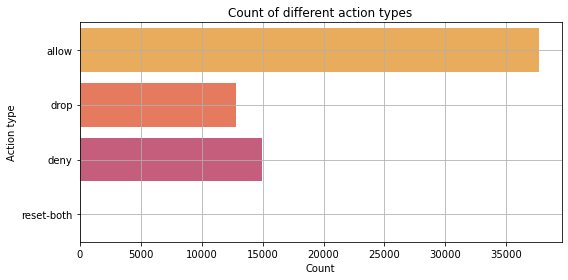

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [9]:
palette = ["#FFAF45", "#FB6D48", "#D74B76", "#673F69"]
plt.figure(figsize=(8, 4))

sns.countplot(data=df, y='Action', palette=palette)
plt.title('Count of different action types')
plt.ylabel('Action type')
plt.xlabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

df['Action'].value_counts()

This plot illustrates the difference between deny, drop, allow and reset-both actions, revealing a significant contrast when compared to the first plot, where allow actions constitute the majority when analyzing the entire dataset. In this comparisson, deny and drop stand out.

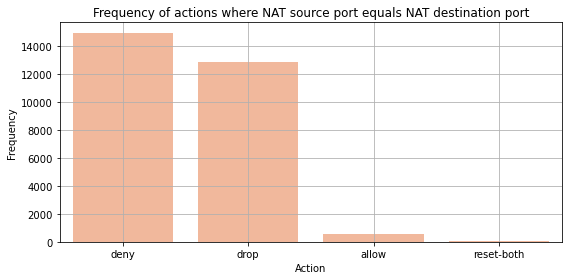

In [10]:
same_ports = df[df['NAT Source Port'] == df['NAT Destination Port']]
unique_actions = same_ports['Action'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=unique_actions.index, y=unique_actions.values, color='#FFB38E')
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Frequency of actions where NAT source port equals NAT destination port')
plt.grid(True)
plt.tight_layout()
plt.show()

The code below reveals that 28432 out of the 65532 rows contain the same NAT address for both the source and destination ports. And when comparing with the code above we can see that in ALL cases where the NAT source and destination are the same, it indicates that a denied and/or dropped packet was returned from the gate and sent back to its origin. That explains why only 564 rows belong to the "allow" action. 

In [11]:
nat_allow = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'allow')])
nat_deny = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'deny')])
nat_drop = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'drop')])
nat_reset_both = len(df[(df['NAT Source Port'] == df['NAT Destination Port']) & (df['Action'] == 'reset-both')])

print("Allow: ", nat_allow)
print("Deny: ", nat_deny)
print("Drop: ", nat_drop)
print("Reset-both: ", nat_reset_both)

Allow:  564
Deny:  14975
Drop:  12851
Reset-both:  42


Something similar happens when examining the Source Port and Destination Port columns. The allow action is still high in the Source Port column, but the distribution of other values appears to be more balanced. The number of drop actions is even higher than the allow actions, and the reset-both remains lower than all the other actions but shows a more balanced distribution compared to all other plots.

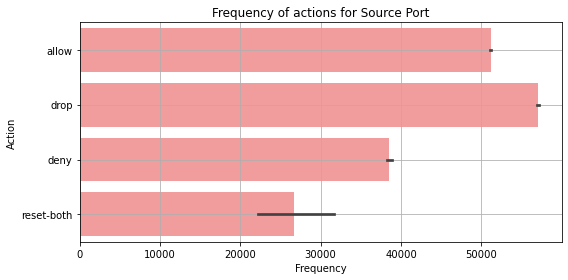

In [12]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['Source Port'], y=df['Action'], color='#FF8E8F')
plt.xlabel('Frequency')
plt.ylabel('Action')
plt.title('Frequency of actions for Source Port')
plt.grid(True)
plt.tight_layout()
plt.show()

When it comes to the Destination Port columns, we can see that the number of records with the values deny and reset-both are more prominent than allow, which is very low. Drop is almost insignificant.

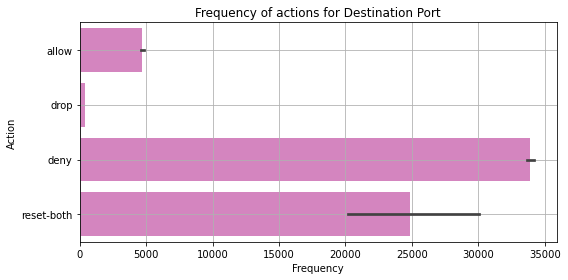

In [13]:
plt.figure(figsize=(8, 4))
sns.barplot(x=df['Destination Port'], y=df['Action'], color='#E178C5')
plt.xlabel('Frequency')
plt.ylabel('Action')
plt.title('Frequency of actions for Destination Port')
plt.grid(True)
plt.tight_layout()
plt.show()

In the following set of plots, we can see that the allow action occurs significantly more frequently than all the other categories. That means that the source port, destination port, NAT source port, and destination source port are the only columns that differ from this pattern.

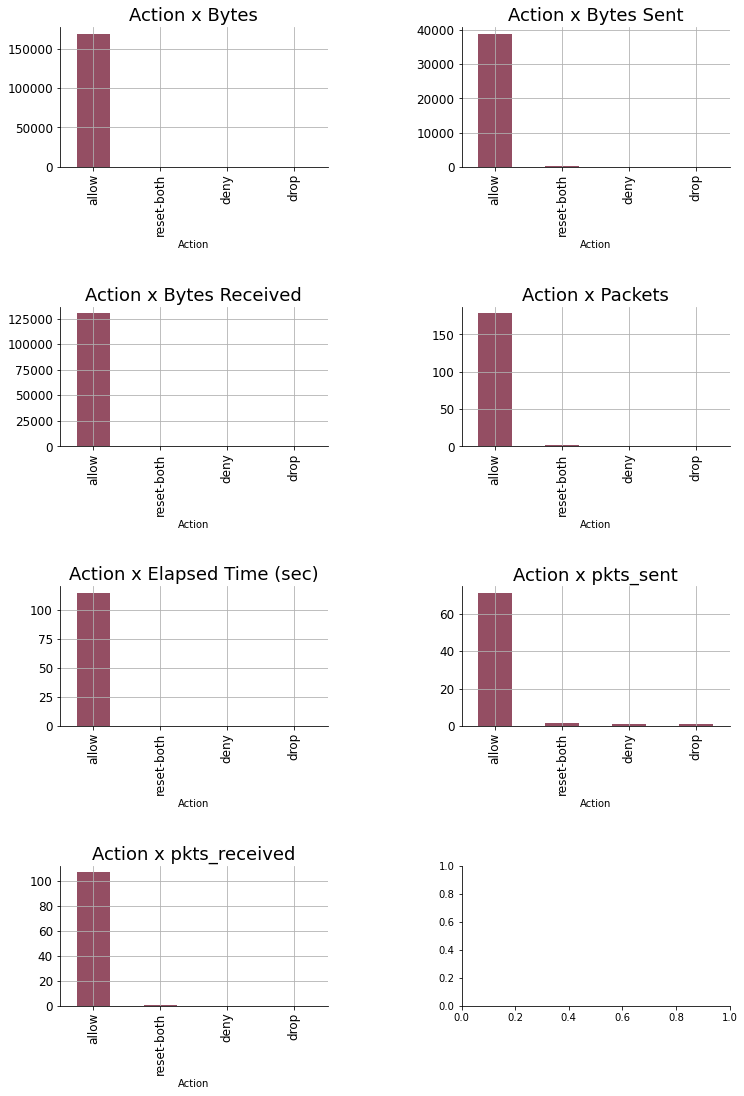

In [14]:
palette = '#944E63'
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))

df.groupby('Action')['Bytes'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12, color=palette)
axarr[0][0].set_title("Action x Bytes", fontsize=18)
axarr[0][0].grid(True)

df.groupby('Action')['Bytes Sent'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12, color=palette)
axarr[0][1].set_title("Action x Bytes Sent", fontsize=18)
axarr[0][1].grid(True)

df.groupby('Action')['Bytes Received'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][0], fontsize=12, color=palette)
axarr[1][0].set_title("Action x Bytes Received", fontsize=18)
axarr[1][0].grid(True)

df.groupby('Action')['Packets'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[1][1], fontsize=12, color=palette)
axarr[1][1].set_title("Action x Packets", fontsize=18)
axarr[1][1].grid(True)

df.groupby('Action')['Elapsed Time (sec)'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12, color=palette)
axarr[2][0].set_title("Action x Elapsed Time (sec)", fontsize=18)
axarr[2][0].grid(True)

df.groupby('Action')['pkts_sent'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12, color=palette)
axarr[2][1].set_title("Action x pkts_sent", fontsize=18)
axarr[2][1].grid(True)

df.groupby('Action')['pkts_received'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12, color=palette)
axarr[3][0].set_title("Action x pkts_received", fontsize=18)
axarr[3][0].grid(True)

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

# 2. Data Preparation
##### Perform any preparation of the data, that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you.[0-30]

##### MinMaxScaler
Use MinMaxScaler to normalize all the numeric features, ensuring they are on a relatively similar scale. This is done by subtracting the minimum value in each feature and then dividing by the range, which is the difference between the maximum and minimum values in the feature. MinMaxScaler preserves the shape of the original distribution while addressing the issues identified in all the EDA plots, ensuring that all features are on a similar scale and avoiding creating bias when training our dataset.

In [15]:
numerical_columns = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 
                     'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 
                     'pkts_sent', 'pkts_received']

min_max_scaler = MinMaxScaler()

df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

In [16]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,0.873165,0.000809,0.832944,0.000809,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003,allow
1,0.858455,0.051713,0.858442,0.051713,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028,allow
2,0.104999,0.767849,0.660182,0.767849,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003,allow
3,0.771401,0.051713,0.771389,0.051713,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021,allow
4,0.762993,0.006760,0.699596,0.006760,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055,allow


##### One-Hot Encoding
Use One-Hot Encoding to transform the "Action" column into four different columns containing binary data. This is done in order to turn categorical variables into numeric values. If the action value is equal to "allow", the "Action_allow" column will contain the value 1. If the action is another one that is not "allow," the column will contain the value 0. This works for all the other action columns, meaning that only one of the four of them will contain the value 1.

In [17]:
df_encoded = pd.get_dummies(df, columns = ['Action'])
df_encoded.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action_allow,Action_deny,Action_drop,Action_reset-both
0,0.873165,0.000809,0.832944,0.000809,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003,1,0,0,0
1,0.858455,0.051713,0.858442,0.051713,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028,1,0,0,0
2,0.104999,0.767849,0.660182,0.767849,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003,1,0,0,0
3,0.771401,0.051713,0.771389,0.051713,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021,1,0,0,0
4,0.762993,0.006760,0.699596,0.006760,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055,1,0,0,0


# 3. Classification Algorithms
#####  Create and implement at least 2 classification algorithms that will output a classification based on the Country: (class attribute) feature. Test these models and try to improve it as you see fit. Discuss your findings and final rational for choosing a particular classification algorithm.[0-40]

Since the "allowed" actions constitute the majority of records in the dataset, I have decided to use this column as the dependent (target) variable. This is what the following code does: it creates the X dataset with all columns except "Action_allow" and the y dataset with only the "Action_allow" column.

In [18]:
X = df_encoded.drop('Action_allow', axis=1)

X.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action_deny,Action_drop,Action_reset-both
0,0.873165,0.000809,0.832944,0.000809,9.217251e-08,3.584694e-08,2.586622e-07,9.651438e-07,0.002772,0.000000,0.000003,0,0,0
1,0.858455,0.051713,0.858442,0.051713,3.708959e-06,1.623655e-06,9.872794e-06,1.737259e-05,0.001571,0.000012,0.000028,0,0,0
2,0.104999,0.767849,0.660182,0.767849,1.402283e-07,6.115066e-08,3.739695e-07,9.651438e-07,0.110772,0.000000,0.000003,0,0,0
3,0.771401,0.051713,0.771389,0.051713,2.573740e-06,1.452855e-06,5.886903e-06,1.351201e-05,0.001571,0.000009,0.000021,0,0,0
4,0.762993,0.006760,0.699596,0.006760,1.992974e-05,7.082933e-06,5.790294e-05,2.895431e-05,0.001478,0.000016,0.000055,0,0,0


In [19]:
y = df_encoded['Action_allow']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: Action_allow, dtype: uint8

Now, I will split the X features and y target datasets into training and testing sets. The test size will be the default 0.25, and the random state will be set to 0 to guarantee the same random split for all three algorithms. This will ensure consistency when performing evaluation and comparison.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [21]:
print("X_train: ", X_train.shape) 
print("y_train: ", y_train.shape) 
print("X_test: ", X_test.shape) 
print("y_test: ", y_test.shape) 

X_train:  (49149, 14)
y_train:  (49149,)
X_test:  (16383, 14)
y_test:  (16383,)


##### Logistic regression
The decision to use linear regression was based on the need to predict the target variable "Action_allow" based on all the other columns in the dataset. This model assumes a linear relationship between X and y, implying that the target variable changes proportionally with changes in all the other features. I am using linear regression to determine how the entire dataset can predict the value of "Action_allow."

Create an instance of the Logistic Regression model and train it using the training data.

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
lr_predictions = lr.predict(X_train)
lr_accuracy = accuracy_score(y_train, lr_predictions)
lr_report = classification_report(y_train, lr_predictions)
lr_confusion_matrix = confusion_matrix(y_train, lr_predictions)

The report summarizes the logistic regression model performance. Precision, recall, and F1-score are at their highest possible values for both classes, with all metrics achieving a score of 1.00. The accuracy is nearly perfect (0.9998779222364647), although a small fraction of the predictions made are incorrect. Overall, the results indicate that the model classification was excellent. The following plots provide a good visualization of these findings.

In [24]:
print('Report:')
print(lr_report)
print('Accuracy:', lr_accuracy)

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20900
           1       1.00      1.00      1.00     28249

    accuracy                           1.00     49149
   macro avg       1.00      1.00      1.00     49149
weighted avg       1.00      1.00      1.00     49149

Accuracy: 0.9998982685303872


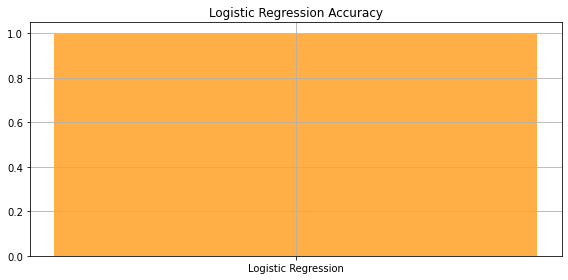

In [25]:
plt.figure(figsize=(8, 4))
plt.bar(["Logistic Regression"], [lr_accuracy], color='#FFAF45')
plt.title("Logistic Regression Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

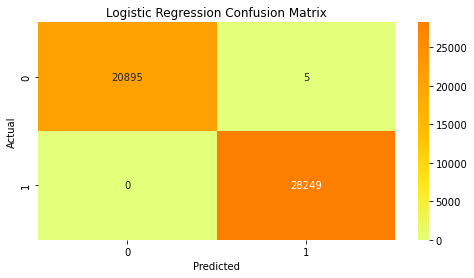

In [26]:
plt.figure(figsize=(8, 4))
sns.heatmap(lr_confusion_matrix, annot=True, cmap='Wistia', fmt='g')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Random Forest Classifier
The second model that I decided to use is the Random Forest Classifier, which utilizes random subsets of the dataset to create multiple decision trees. It then classifies the data based on those decision trees, calculating the prediction for each of them and taking the most popular result. We can see that it gathered very good results, as did the logistic regression model.

Create an instance of the Random Forest Classifier model and train it using the training data.

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
rf_predictions = rf.predict(X_train)
rf_accuracy = accuracy_score(y_train, rf_predictions)
rf_report = classification_report(y_train, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_train, rf_predictions)

We can observe that when comparing the classification report from the random forest classifier with the logistic regression model, both reports demonstrate the almost the exact same performance. Because both models display almost the same and outstanding performance metrics, I have decided to train the data using a third classification algorithm.

In [29]:
print('Report:')
print(rf_report)
print('Accuracy:', rf_accuracy)

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20900
           1       1.00      1.00      1.00     28249

    accuracy                           1.00     49149
   macro avg       1.00      1.00      1.00     49149
weighted avg       1.00      1.00      1.00     49149

Accuracy: 1.0


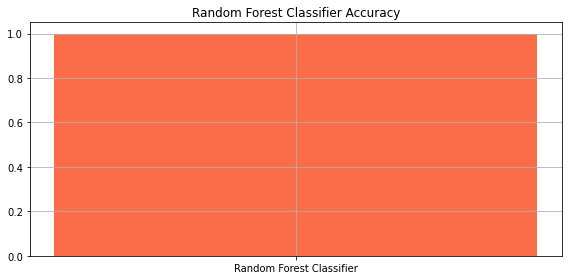

In [30]:
plt.figure(figsize=(8, 4))
plt.bar(["Random Forest Classifier"], [rf_accuracy], color='#FB6D48')
plt.title("Random Forest Classifier Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

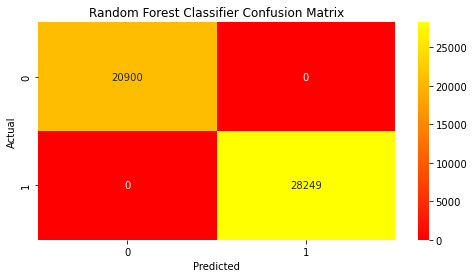

In [31]:
plt.figure(figsize=(8, 4))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='autumn', fmt='g')
plt.title("Random Forest Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### K-Nearest Neighbors
The following algorithm will work like a voting system, where the majority class label will determine the class label of a new data point among its nearest neighbors in the feature space. If the majority of the k nearest neighbors support the "Action_allow," for example, then this majority class label will likely determine that the next neighbor will also vote for "Action_allow."

Create an instance of the K-Nearest Neighbors model and train it using the training data.

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
knn_predictions = knn.predict(X_train)
knn_accuracy = accuracy_score(y_train, knn_predictions)
knn_report = classification_report(y_train, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_train, knn_predictions)

The report from the K-Nearest Neighbors model is almost identical to the previous ones. The performance metrics for all metrics are perfect for both classes, but the accuracy is lower than the previous model, being close to but not exactly perfect. It means that a small fraction of the predictions made are incorrect, but the difference between 1.0, 0.9998779222364647 and 0.9999186148243098 is almost insignificant. Overall, it reflects the same great performance as the previous reports, being even higher than the Logistic Regression.

In [34]:
print('Report:')
print(knn_report)
print('Accuracy:', knn_accuracy)

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20900
           1       1.00      1.00      1.00     28249

    accuracy                           1.00     49149
   macro avg       1.00      1.00      1.00     49149
weighted avg       1.00      1.00      1.00     49149

Accuracy: 1.0


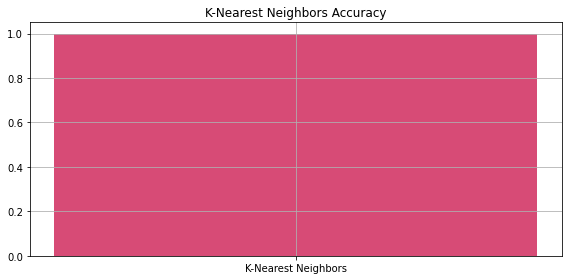

In [35]:
plt.figure(figsize=(8, 4))
plt.bar(["K-Nearest Neighbors"], [knn_accuracy], color='#D74B76')
plt.title("K-Nearest Neighbors Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

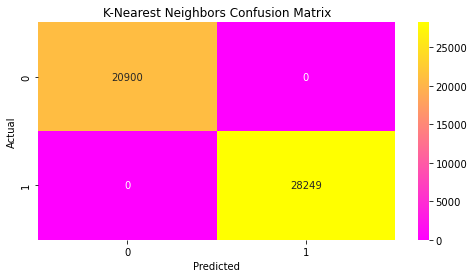

In [36]:
plt.figure(figsize=(8, 4))
sns.heatmap(knn_confusion_matrix, annot=True, cmap='spring', fmt='g')
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### Hyperparameter Tuning for K-Nearest Neighbors
Hyperparameters are used to configure a set variables before the training process starts. They control the learning process and are often used to tune the performance of the model, impacting the model's metrics significantly when correctly applied. The hyperparameter technique used below is GridSearchCV which fits the model using all possible combinations from the grid of values. The performance of each set is logged so that we can choose the combination that outputs the best results. In summary, it searches for the best set of hyperparameters from a grid of hyperparameter values. We can use grid search to identify the best of them, but this approach can be slow and consume a lot of processing power, which is not necessary for our dataset and model. However, I will demonstrate how it works with the K-Nearest Neighbors model.

This line of code creates a parameter grid dictionary for the K-Nearest Neighbors model. It does so by setting 'n_neighbors' as the key, and assigns a range of values from 1 to 20 as the values to be tested.

In [37]:
param_grid = {'n_neighbors': range(1, 21)}

Now we create the GridSearchCV object. It takes the previous "knn" instance, the param_grid that we already defined, and the number of times the data will be split for cross-validation, which is 5. Ans then we fit the data into the model.

In [38]:
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

- The first line prints the best parameters found by the grid search for the K-Nearest Neighbors model.
- The second line prints the best score achieved by the model using the best parameters described above.

In [39]:
print(f'Best parameters: {knn_cv.best_params_}')
print(f'Best score: {knn_cv.best_score_}')

Best parameters: {'n_neighbors': 1}
Best score: 1.0


As we can see in the plot below, despite achieving the maximum score, the use of GridSearchCV didn't significantly improve performance in this particular case. Regarding the running time, the hyperparameter tuning implementation for the KNN model took several minutes to process, confirming the slowness and substantial processing power needed that was mentioned at the beginning of this section.

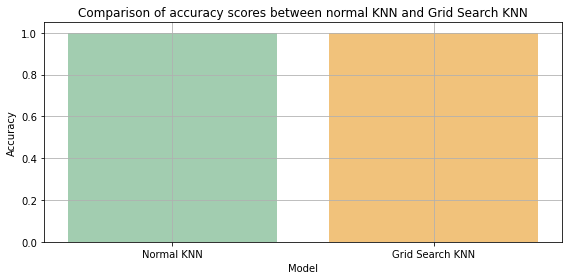

In [40]:
accuracy_scores = [knn_accuracy, knn_cv.best_score_]
labels = ['Normal KNN', 'Grid Search KNN']

plt.figure(figsize=(8, 4))
plt.bar(labels, accuracy_scores, color=['#A2CDB0', '#F1C27B'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of accuracy scores between normal KNN and Grid Search KNN')
plt.grid(True)
plt.tight_layout()
plt.show()

The following compares the accuracy among all three classification models: Logistic Regression, Random Forest Classification, and K-Nearest Neighbors. We can see that the difference is so slight that we wouldn't be able to see it in the plot if it weren't for the labels.

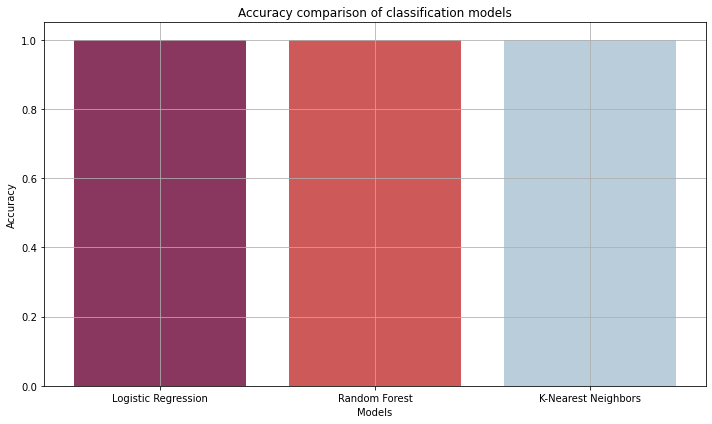

In [41]:
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors']
accuracies = [lr_accuracy, rf_accuracy, knn_accuracy]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['#89375F', '#CE5959', '#BACDDB'])
plt.title('Accuracy comparison of classification models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Test Data
##### Make a classification using your test data, using your final classification algorithm and comment on the accuracy differential between the training and testing set.[0-10]

I have decided to use logistic regression as my final classification algorithm. Since all of the selected models have demonstrated similar overall performance (with 0.9998779222364647 being only 0.9998779222364647 smaller than 1.0), it appears logical to use the simpler one. Logistic regression is easier to interpret, understand and  implement, ensuring good results while not wasting computing resources.

Create an instance of the random forest classifier model and train it using the testing data.

In [42]:
lr_final_predictions = lr.predict(X_test)

In [43]:
lr_final_accuracy = accuracy_score(y_test, lr_final_predictions)
lr_final_report = classification_report(y_test, lr_final_predictions)

We can observe that when applying the model to the testing data, the accuracy is even higher than when we applied logistic regression to the training data. The difference is not big, only 0.000122077763535299, but we achieved perfect accuracy using fewer computing resources than the random forest classifier model, for example. This proves that even though we might think that other algorithms may be better due to their complexity, it is better to apply simpler algorithms in certain situations.

In [44]:
print('Accuracy:', lr_final_accuracy)
print('Classification Report:')
print(lr_final_report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6992
           1       1.00      1.00      1.00      9391

    accuracy                           1.00     16383
   macro avg       1.00      1.00      1.00     16383
weighted avg       1.00      1.00      1.00     16383



The plot below calculates the difference between the accuracy of the training and testing predictions, plotting both accuracies along with the difference between them. We can see that the difference can be considered insignificant as it is barely visible.

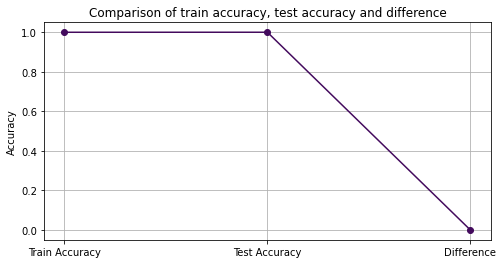

In [45]:
accuracy_difference = lr_final_accuracy - lr_accuracy

plt.figure(figsize=(8, 4))
plt.plot(["Train Accuracy", "Test Accuracy", "Difference"], [lr_accuracy, lr_final_accuracy, accuracy_difference], marker='o', color='#430A5D')
plt.title("Comparison of train accuracy, test accuracy and difference")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# 5. Conclusion

After analyzing the "log2.csv" firewall dataset, one important discovery was that "allow" was the most recurrent action in the entire dataset. When examining the NAT source and destination ports, it became evident that the "allow" category was not the majority only when both source and destination NAT addresses were the same. This occurred because denied or dropped packets were returned from the gate and sent back to their origin with the same address.

Based on these insights, Logistic Regression, Random Forest classifier, and K-Nearest Neighbors were chosen as the algorithms to train the datasets. To prepare the data, I used One-Hot Encoding to transform the four action categories into binary values, while MinMaxScaler was applied to normalize all numeric variables, ensuring uniformity and improved scaling for better results.

Before applying the models, the dataset was split into training and testing sets. The training data was used when applying each algorithm, followed by performance evaluation using metrics such as accuracy, precision, recall, and F1-score. Hyperparameter tuning was conducted for the K-Nearest Neighbor model to optimize its performance, since this was the model that exhibited the weakest performance. But overall, all three models displayed outstanding performance, with accuracy scores perfect (1.0) or close to perfect 0.9998779222364647 and 0.9999186148243098, respectively.

Visualizations, including accuracy plots and confusion matrices, were utilized to provide a clear representation of model performance and comparison between algorithms. While the random forest classifier demonstrated the highest accuracy, logistic regression was chosen as the final algorithm due to its simplicity and interpretability, which aligned well with the characteristics of the dataset.

# 6. Referencing

- Benie, P. (no date) Drop versus Reject. Available at: https://www.chiark.greenend.org.uk/~peterb/network/drop-vs-reject#:~:text=When%20a%20packet%20reaches%20the,ALLOW%20(aka%20ACCEPT) (Accessed: 25 March 2024).

- Mahadevan, M. (2024) Step-by-Step Exploratory Data Analysis (EDA) using Python, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/ (Accessed: 25 March 2024).

- Follow meAjitesh KumarI have been recently working in the area of Data analytics including Data Science and Machine Learning / Deep Learning. I am also passionate about different technologies including programming languages such as Java/JEE (2023) MinMaxScaler vs StandardScaler - Python Examples, Analytics Yogi. Available at: https://vitalflux.com/minmaxscaler-standardscaler-python-examples/ (Accessed: 25 March 2024).

- Gogia, N. (2024) Why Scaling is Important in Machine Learning?, Medium. Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/why-scaling-is-important-in-machine-learning-aee5781d161a (Accessed: 25 March 2024).

- GfG (2023) Linear Regression (Python Implementation), GeeksforGeeks. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/linear-regression-python-implementation/ (Accessed: 26 March 2024).

- Shafi, A. (2023) Random Forest Classification with Scikit-Learn, DataCamp. DataCamp. Available at: https://www.datacamp.com/tutorial/random-forests-classifier-python (Accessed: 26 March 2024).

- Shafi, A. (2023) K-Nearest Neighbors (KNN) Classification with scikit-learn, DataCamp. DataCamp. Available at: https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn (Accessed: 26 March 2024).

- The following compares the accuracy among all three classification models: Logistic Regression, Random Forest Classification, and K-Nearest Neighbors. We can see that the difference is so slight that we wouldn't be able to discern it in the plot if it weren't for the labels.